## Romeo and Juliet, a Dynamical Love Affair in Python

We consider a romatic affair between  Romeo and Juliet, where R(t) is Romeo’s love (or hate if negative) for Juliet at time t and J(t) is Juliet’s love for Romeo.

**dR/dT=aR+bJ**

**dJ/dT=cR+dJ**

where a  and  b  specify  Romeo’s  love,  and  c  and  d  specify  Juliet’s love. Parameter  a  describes  the  extent  to  which  Romeo  is  determined  by  his  own  feelings,  and  b  is  the  extent  to  which  he  is determined  by  Juliet’s  feelings. Likewise,  d  describes  the  extent  to  which  Juliet  is  determined  by  her  own  feelings,  and  b  is  the  extent  to  which  she  is determined  by  Romeo’s  feelings.

Parameters a and d can be thought of as "behavioral inertia", and b and c as "influence function". The  resulting  dynamics  are  two-dimensional,   governed   by   the   initial   conditions   and   the   four   parameters, which may be positive or negative.


To implement this model in Python, we first import the necessary libraries. We will use [odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) to solve the differential equations.

In [4]:
# Here we import the necessary numpy for numerical computation
import numpy as np
# We imported the odeint from the scipy.integrate module
from scipy.integrate import odeint 
# We imported matplotlib.pyplot as plt for visualization
import matplotlib.pyplot as plt

We then define the time scale to be explored numerically.

In [6]:
# We initialized the start time 0, stop time 50
tstart= 0
tstop= 50
# We set the incremental between 0 to 50, by 0.1
increment = 0.1
# We set the [3.14, -0.5] to variable x0
x0 = [3.14,-0.5]

# We set the 'behavioral inertia' and 'influence function' parameters for Juliet and Romeo
# a being the behavioural inertia for Romeo to love Juliet, this was set to 0
# This means that Romeo's capacity to love Juliet is fully dependent on Juliet's feelings for him


# b being the influence function parameter of Juliet on Romeo's feelings for her, this was set to 0.4
# c being the influence function parameter of Romeo on Juliet's feeling for him, this was set to 0.3



# e being the behavioural inertia for Juliet to love Romeo, this was set to 0 
# this means that Juliet capacity to love Romeo is fully dependent on Romeo's influence function on her.
a=0
b=0.4
c=-0.3
e=0

In [7]:
# We set the time range from 0 to 50, with an increment of 0.1
t = np.arange(tstart,tstop+1,increment)


# We wrote our differential equation function (ODE)
# We put two arguments x which is the
# We set the time t we already defined above
# Function that returns dx/dt
def mydiff(x, t):
    # We defined a variable, dRdt = aRomeo + bJuliet, dJdt = cRomeo + dJuliet
  dRdt = a*x[0]+ b*x[1]
  dJdt = c*x[0]+ e*x[1]

    # We set the coupled differential equation
  dxdt= [dRdt,dJdt]
  
  return dxdt

In [8]:
# Solve ODE
# We use the 'odeint' function, 
# we passed the differential equation, 
# the initial conditions, and time interval
x = odeint(mydiff, x0, t)
# We printed the value of x
print(x)
print("---------------------------------------")
print("---------------------------------------")
print("---------------------------------------")
print("---------------------------------------")
print("---------------------------------------")
# We printed the values of R changing with respect time t we set
R = x[:,0]
# We printed the values of J changing with respect time t we set
J = x[:,1]
#print(J)
print(R)
print("---------------------------------------")
print("---------------------------------------")
print("---------------------------------------")
print("---------------------------------------")
print("---------------------------------------")

print(J)


[[ 3.14       -0.5       ]
 [ 3.11812019 -0.59388117]
 [ 3.09249901 -0.68704977]
 ...
 [ 1.43471526  2.46999909]
 [ 1.53263473  2.42548439]
 [ 1.62871521  2.3780594 ]]
---------------------------------------
---------------------------------------
---------------------------------------
---------------------------------------
---------------------------------------
[ 3.14        3.11812019  3.09249901  3.0631672   3.03015996  2.99351689
  2.95328196  2.90950344  2.86223387  2.81152996  2.75745256  2.70006653
  2.63944074  2.57564795  2.50876471  2.43887124  2.36605142  2.29039263
  2.21198564  2.13092452  2.04730656  1.96123207  1.87280434  1.78212946
  1.68931625  1.59447606  1.49772269  1.39917223  1.29894293  1.19715506
  1.09393074  0.98939384  0.88366979  0.77688544  0.66916892  0.56064947
  0.45145731  0.34172346  0.23157958  0.12115783  0.0105907  -0.09998913
 -0.21044898 -0.32065632 -0.43047892 -0.53978499 -0.64844338 -0.75632372
 -0.86329656 -0.96923354 -1.07400757 -1.17749291

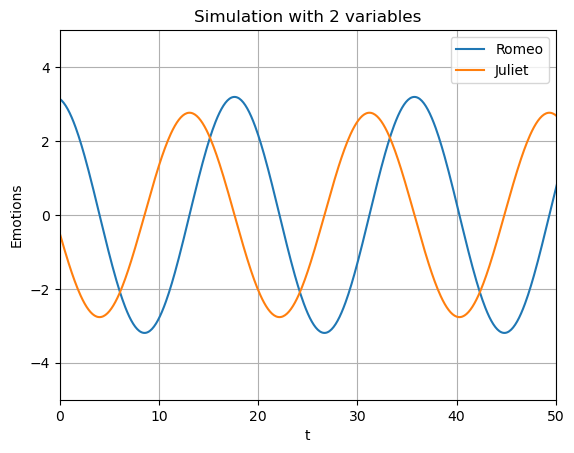

In [9]:
# We plotted the graph of R changing with respect to the time interval
plt.plot(t,R)
# We plotted the graph of J changing with respect to the time interval
plt.plot(t,J)
# We set the title of the graph
plt.title('Simulation with 2 variables')
# We set the x label
plt.xlabel('t')
# We set the y label
plt.ylabel('Emotions')
# We applied grid for clarity of the chart
plt.grid()
# We also set the x axis from 0 - 50, and -5 - 5 on the y axis
plt.axis([0, 50, -5, 5])
# We set legends for the chart
plt.legend(["Romeo", "Juliet"])
# We plot the show
plt.show()

Text(0, 0.5, 'Juliette')

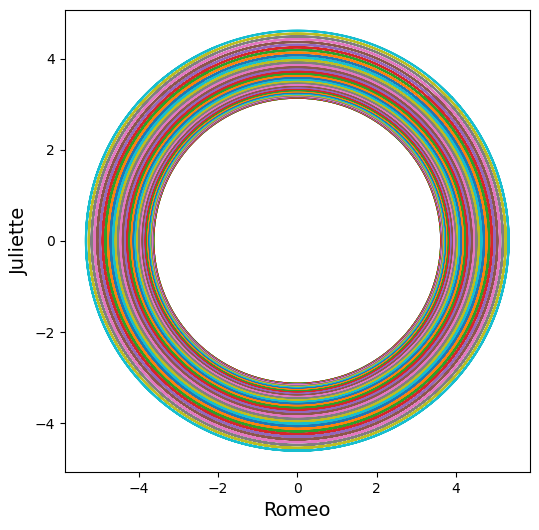

In [10]:
# We plotted a phase plots to analyze the behaviour of the system when Romeo's feelings are changing from 0.0 to 4.0 with 0.1 increment
# We set the initial conditions 0.0, 4.0, 0.1

fig = plt.figure()
fig.set_size_inches(6,6) # Square plot, 1:1 aspect ratio
ics = np.arange(0.0, 4.0, 0.1) # initial conditions
# We have a loop where for each initial condition in ics,
# We have a pair r, 3.14
# We set this to our odeint()
# Where our arguments are 1. coupled first order differential equation 2. the initial conditions which is x0 and the time interval
# # We keep Julient initial condition constant
for r in ics:
  x0 = [r, 3.14]
  x = odeint(mydiff, x0, t)
    # We then plot the behaviour
    # Each trajectory represents how Romeo’s and Juliet’s feelings change for a different initial condition of Romeo’s feelings, 
    # while initial conditions of Juliet remains constant
  plt.plot(x[:,0], x[:,1], "-")
plt.xlabel("Romeo", fontsize=14)
plt.ylabel("Juliette", fontsize=14)




# 1. The trajectories of the phase plot forms closed loops, the system is oscillating (showing a cycle of oscillating feelings between Romeo and Juliet).
# 2. If this converge to a single point, as opposed to a closed uneding loop as the below, 
# it suggests that Romeo and Juliet love or feelings, stabilize over time.


# This pattern below suggest MUTUAL DEPENDENCIES, suggesting that there is balanced dependencies between love and hate for each other.

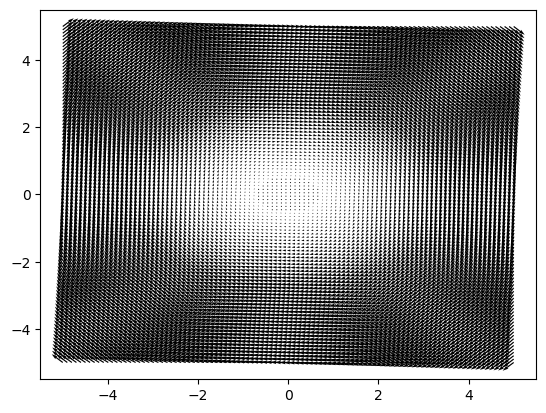

In [11]:
# We created 100 equally spaced points between −5 and 5 both Rx and Jy.
# Rx represents the range of Romeo's feelings (R), and Jy represents the range of Juliet's feelings (J).
Rx = np.linspace(-5,5,100)
Jy = np.linspace(-5,5,100)
# the np.meshgrid() function creates two 2D arrays RX and JY that represent all possible combinations of R and J
RX, JY = np.meshgrid(Rx,Jy)
# We computed the derivatives of Romeo's and Juliet's feelings using the mydiff function
z=np.array(mydiff(np.array([RX,JY]),0))
# We used the plt.quiver to creates a vector field plot
plt.quiver(RX,JY,*z,scale=90)
# We plot the mesh grid and the vector field between and 5 by 5, Romeo against Juliet
plt.show()

In [12]:
# Insights
# THe pplot gives an intuitive way to interprete the result
# The arrows form closed loops or cycles, this indicates OSCILLATORY behavior, meaning their feelings will oscillate between love and hate endlessly.
# We observe MUTUAL DEPENDENCY.